 # Predictive Maintenance

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import  LeaveOneOut
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Data reading

In [ ]:
df = pd.read_csv('Vehicle Maintenance- Service Records.csv',index_col=0)


In [ ]:
df


,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,engine_oil,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
slno,,,,,,,,,,,,,,,,,,,,,
1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,1,...,0,0,0,0,0,0,0,0,0,2566
2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,1,...,0,0,0,0,0,0,0,0,0,2633
3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,1,...,0,0,0,0,0,0,0,0,0,2643
4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,1,...,0,0,0,0,0,0,0,0,0,2532
5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,1,...,0,0,0,0,0,0,0,0,0,2489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,car,toyota,fortuner,diesel,2016,mumbai,100000,96236,1,1,...,0,1,0,0,0,0,0,0,0,7289
1136,car,toyota,fortuner,diesel,2016,mumbai,100000,93438,1,1,...,0,1,0,0,0,0,0,0,0,7280
1137,car,toyota,fortuner,diesel,2016,mumbai,100000,106788,1,1,...,1,1,0,1,0,0,0,0,0,7310


In [ ]:
df.columns

Index(['vehicle_type', 'brand', 'model', 'engine_type', 'make_year', 'region',
       'mileage_range', 'mileage', 'oil_filter', 'engine_oil',
       'washer_plug_drain', 'dust_and_pollen_filter',
       'whell_alignment_and_balancing', 'air_clean_filter', 'fuel_filter',
       'spark_plug', 'brake_fluid', 'brake_and_clutch_oil',
       'transmission_fluid', 'brake_pads', 'clutch', 'coolant', 'cost'],
      dtype='object')

# Data Cleaning

## 1.1 Check the missing values

In [ ]:
df.isna().sum()


vehicle_type                     0
brand                            0
model                            0
engine_type                      0
make_year                        0
region                           0
mileage_range                    0
mileage                          0
oil_filter                       0
engine_oil                       0
washer_plug_drain                0
dust_and_pollen_filter           0
whell_alignment_and_balancing    0
air_clean_filter                 0
fuel_filter                      0
spark_plug                       0
brake_fluid                      0
brake_and_clutch_oil             0
transmission_fluid               0
brake_pads                       0
clutch                           0
coolant                          0
cost                             0
dtype: int64

In [ ]:
df.describe()

,make_year,mileage_range,mileage,oil_filter,engine_oil,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
count,1139.000000,1139.000000,1139.000000,1139.0,1139.0,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000
mean,2016.423178,45443.371378,46560.937665,1.0,1.0,0.881475,0.279192,0.258999,0.382792,0.287094,0.063213,0.151888,0.134328,0.142230,0.141352,0.132572,0.055312,5230.838455
std,0.496055,24759.850030,25817.865850,0.0,0.0,0.323371,0.448799,0.438278,0.486282,0.452605,0.243453,0.359070,0.341155,0.349439,0.348537,0.339261,0.228688,2191.216597
min,2016.000000,10000.000000,9021.000000,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1099.000000
25%,2016.000000,30000.000000,27327.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3678.500000
50%,2016.000000,40000.000000,41787.000000,1.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5199.000000
75%,2017.000000,60000.000000,61278.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6584.000000
max,2018.000000,100000.000000,137822.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1139
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   vehicle_type                   1139 non-null   object
 1   brand                          1139 non-null   object
 2   model                          1139 non-null   object
 3   engine_type                    1139 non-null   object
 4   make_year                      1139 non-null   int64 
 5   region                         1139 non-null   object
 6   mileage_range                  1139 non-null   int64 
 7   mileage                        1139 non-null   int64 
 8   oil_filter                     1139 non-null   int64 
 9   engine_oil                     1139 non-null   int64 
 10  washer_plug_drain              1139 non-null   int64 
 11  dust_and_pollen_filter         1139 non-null   int64 
 12  whell_alignment_and_balancing  1139 non-null   int64 
 13  air

In [ ]:
df

,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,engine_oil,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
slno,,,,,,,,,,,,,,,,,,,,,
1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,1,...,0,0,0,0,0,0,0,0,0,2566
2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,1,...,0,0,0,0,0,0,0,0,0,2633
3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,1,...,0,0,0,0,0,0,0,0,0,2643
4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,1,...,0,0,0,0,0,0,0,0,0,2532
5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,1,...,0,0,0,0,0,0,0,0,0,2489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,car,toyota,fortuner,diesel,2016,mumbai,100000,96236,1,1,...,0,1,0,0,0,0,0,0,0,7289
1136,car,toyota,fortuner,diesel,2016,mumbai,100000,93438,1,1,...,0,1,0,0,0,0,0,0,0,7280
1137,car,toyota,fortuner,diesel,2016,mumbai,100000,106788,1,1,...,1,1,0,1,0,0,0,0,0,7310


In [ ]:
for i in df.columns:
    print("Value counts for column", i)
    print(df[i].value_counts())
    print("----")


Value counts for column vehicle_type
car    1139
Name: vehicle_type, dtype: int64
----
Value counts for column brand
honda     979
toyota    160
Name: brand, dtype: int64
----
Value counts for column model
jazz        342
amaze       321
city        316
fortuner    160
Name: model, dtype: int64
----
Value counts for column engine_type
diesel    659
petrol    480
Name: engine_type, dtype: int64
----
Value counts for column make_year
2016    658
2017    480
2018      1
Name: make_year, dtype: int64
----
Value counts for column region
mumbai     659
chennai    480
Name: region, dtype: int64
----
Value counts for column mileage_range
30000     160
10000     143
40000     142
60000     142
20000     141
50000     141
70000     138
80000      70
100000     62
Name: mileage_range, dtype: int64
----
Value counts for column mileage
60347     9
40282     6
30463     6
39236     5
20657     5
         ..
9075      1
11468     1
10457     1
10860     1
110757    1
Name: mileage, Length: 754, dtype

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 1139
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   vehicle_type                   1139 non-null   object
 1   brand                          1139 non-null   object
 2   model                          1139 non-null   object
 3   engine_type                    1139 non-null   object
 4   make_year                      1139 non-null   int64 
 5   region                         1139 non-null   object
 6   mileage_range                  1139 non-null   int64 
 7   mileage                        1139 non-null   int64 
 8   oil_filter                     1139 non-null   int64 
 9   engine_oil                     1139 non-null   int64 
 10  washer_plug_drain              1139 non-null   int64 
 11  dust_and_pollen_filter         1139 non-null   int64 
 12  whell_alignment_and_balancing  1139 non-null   int64 
 13  air

In [ ]:
df.head(

)

,vehicle_type,brand,model,engine_type,make_year,region,mileage_range,mileage,oil_filter,engine_oil,...,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
slno,,,,,,,,,,,,,,,,,,,,,
1,car,honda,jazz,petrol,2017,chennai,10000,11400,1,1,...,0,0,0,0,0,0,0,0,0,2566
2,car,honda,jazz,petrol,2017,chennai,10000,11453,1,1,...,0,0,0,0,0,0,0,0,0,2633
3,car,honda,jazz,petrol,2017,chennai,10000,10706,1,1,...,0,0,0,0,0,0,0,0,0,2643
4,car,honda,jazz,petrol,2017,chennai,10000,11015,1,1,...,0,0,0,0,0,0,0,0,0,2532
5,car,honda,jazz,petrol,2017,chennai,10000,10039,1,1,...,0,0,0,0,0,0,0,0,0,2489


Here, we want to drop any column that has the same value for all its rows, because during training, if all the values in a column ( 'type') for example are the same, it cannot be used as a feature.

In [ ]:
df = df.drop('oil_filter', axis=1)
df = df.drop('engine_oil', axis=1)
df = df.drop('make_year', axis=1)
df = df.drop('region', axis=1)
df = df.drop('vehicle_type', axis=1)
df = df.drop('mileage_range', axis=1)

In [ ]:
df.columns

Index(['brand', 'model', 'engine_type', 'mileage', 'washer_plug_drain',
       'dust_and_pollen_filter', 'whell_alignment_and_balancing',
       'air_clean_filter', 'fuel_filter', 'spark_plug', 'brake_fluid',
       'brake_and_clutch_oil', 'transmission_fluid', 'brake_pads', 'clutch',
       'coolant', 'cost'],
      dtype='object')

In [ ]:
df

,brand,model,engine_type,mileage,washer_plug_drain,dust_and_pollen_filter,whell_alignment_and_balancing,air_clean_filter,fuel_filter,spark_plug,brake_fluid,brake_and_clutch_oil,transmission_fluid,brake_pads,clutch,coolant,cost
slno,,,,,,,,,,,,,,,,,
1,honda,jazz,petrol,11400,0,0,1,0,0,0,0,0,0,0,0,0,2566
2,honda,jazz,petrol,11453,0,0,1,0,0,0,0,0,0,0,0,0,2633
3,honda,jazz,petrol,10706,0,0,0,0,0,0,0,0,0,0,0,0,2643
4,honda,jazz,petrol,11015,0,0,0,0,0,0,0,0,0,0,0,0,2532
5,honda,jazz,petrol,10039,0,0,0,0,0,0,0,0,0,0,0,0,2489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,toyota,fortuner,diesel,96236,1,1,0,0,1,0,0,0,0,0,0,0,7289
1136,toyota,fortuner,diesel,93438,1,1,0,0,1,0,0,0,0,0,0,0,7280
1137,toyota,fortuner,diesel,106788,1,0,1,1,1,0,1,0,0,0,0,0,7310


# Data analysis

<ipython-input-18-1b3878a1d959>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


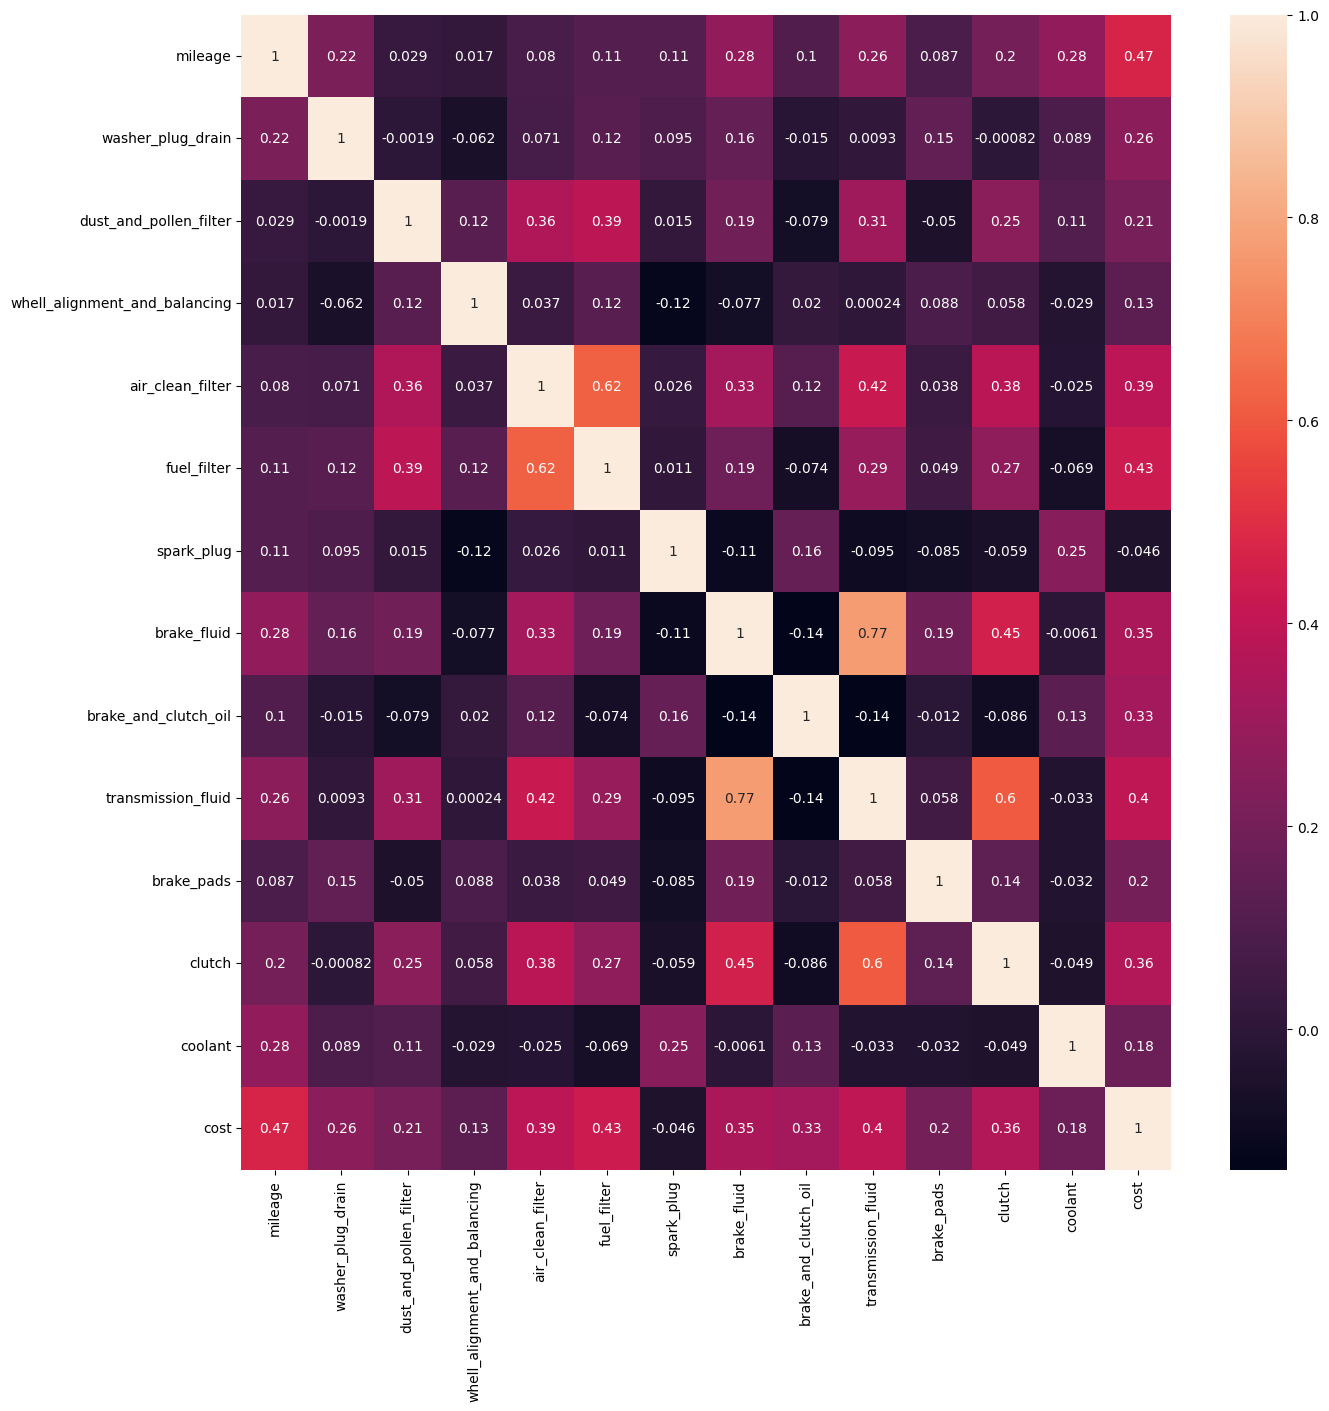

In [ ]:
plt.figure(figsize=(15, 15))  
sns.heatmap(df.corr(), annot=True)  
plt.show()

## Check normal distrbution 

### The Mileage

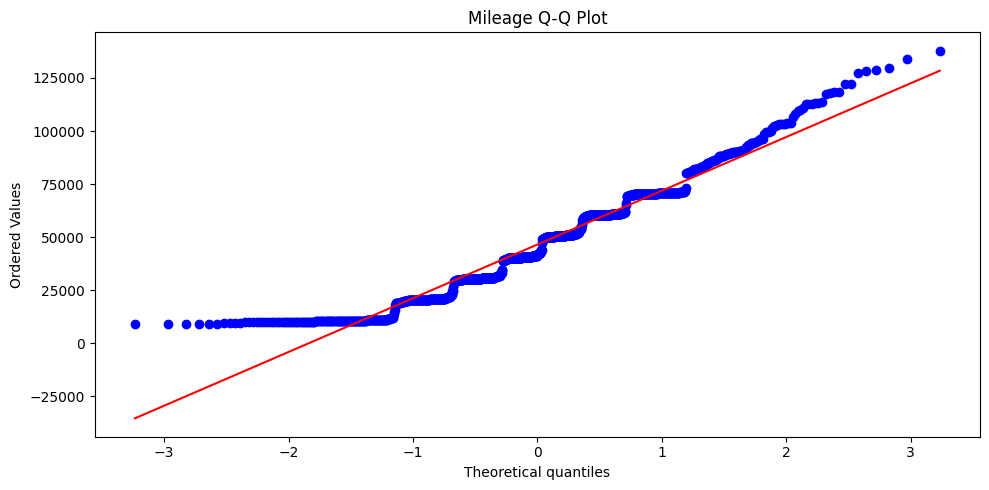

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
stats.probplot(df['mileage'], dist="norm", plot=ax)
ax.set_title('Mileage Q-Q Plot')
plt.tight_layout()
plt.show()

### The Cost

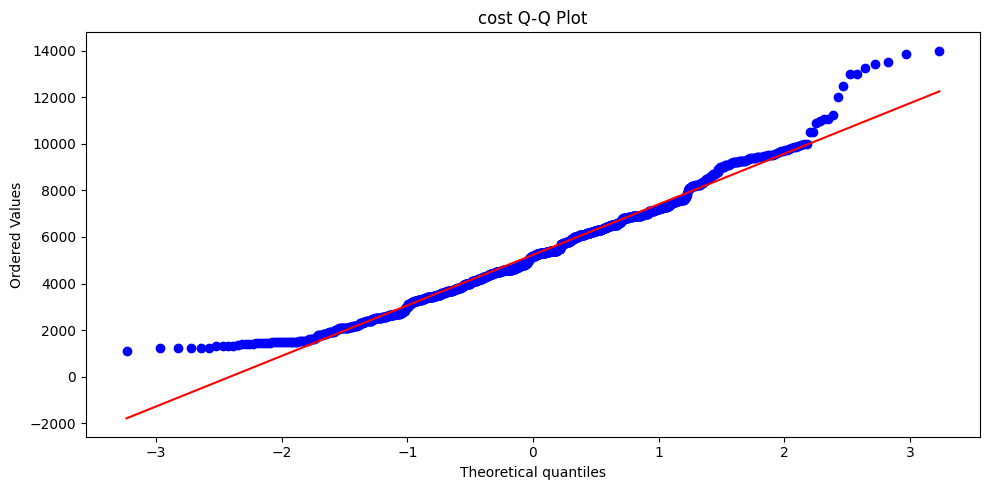

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
stats.probplot(df['cost'], dist="norm", plot=ax)
ax.set_title('cost Q-Q Plot')
plt.tight_layout()
plt.show()

# Data Processing

## One hot encoding

In [ ]:
df = pd.get_dummies(df, columns=['brand', 'model', 'engine_type'])
print(df)

      mileage  washer_plug_drain  dust_and_pollen_filter  \
slno                                                       
1       11400                  0                       0   
2       11453                  0                       0   
3       10706                  0                       0   
4       11015                  0                       0   
5       10039                  0                       0   
...       ...                ...                     ...   
1135    96236                  1                       1   
1136    93438                  1                       1   
1137   106788                  1                       0   
1138   112576                  1                       0   
1139   110757                  1                       1   

      whell_alignment_and_balancing  air_clean_filter  fuel_filter  \
slno                                                                 
1                                 1                 0            0   
2        

## Feauture Selction

In [ ]:
X = df.drop('cost', axis=1).values
X

array([[ 11400,      0,      0, ...,      1,      0,      1],
       [ 11453,      0,      0, ...,      1,      0,      1],
       [ 10706,      0,      0, ...,      1,      0,      1],
       ...,
       [106788,      1,      0, ...,      0,      1,      0],
       [112576,      1,      0, ...,      0,      1,      0],
       [110757,      1,      1, ...,      0,      1,      0]])

In [ ]:
y = df['cost'].values
y

array([2566, 2633, 2643, ..., 7310, 7349, 7399])

## StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Split The Data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

 # Models

## 1-Lasso 

### Try alpha with any value (HyperParamter)

In [ ]:
alpha = 0.3
regressor = Lasso(alpha=alpha)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.774e+05, tolerance: 3.773e+05
  model = cd_fast.enet_coordinate_descent(


In [ ]:
score = regressor.score(X_test, y_test)
print("Coefficient of determination (R^2):", score)

Coefficient of determination (R^2): 0.7353742421929557


### Increase Number of iterations

In [ ]:
regressor = Lasso(alpha=alpha, max_iter=1500)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = regressor.score(X_test, y_test)
print("Coefficient of determination (R^2):", score)

Coefficient of determination (R^2): 0.7353732887284831


### Calculate the alpha

Optimal alpha: 1.291549665014884
Coefficient of determination (R^2): 0.7353523626871337


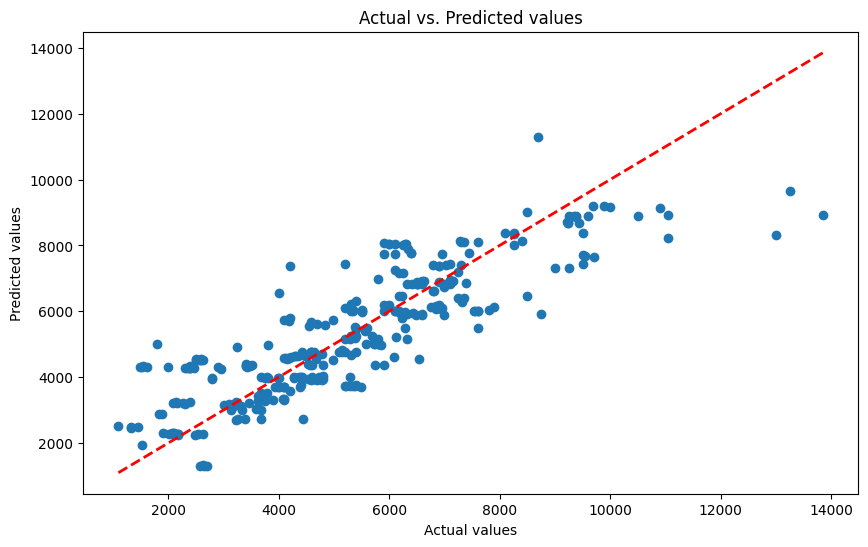

In [ ]:
alphas = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=0, max_iter=1000)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
regressor = Lasso(alpha=optimal_alpha, max_iter=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
print("Optimal alpha:", optimal_alpha)
print("Coefficient of determination (R^2):", score)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

### CV IS HyperParamter we can use Leave_one_out

Optimal alpha: 0.5590810182512228
Coefficient of determination (R^2): 0.7353689002412358


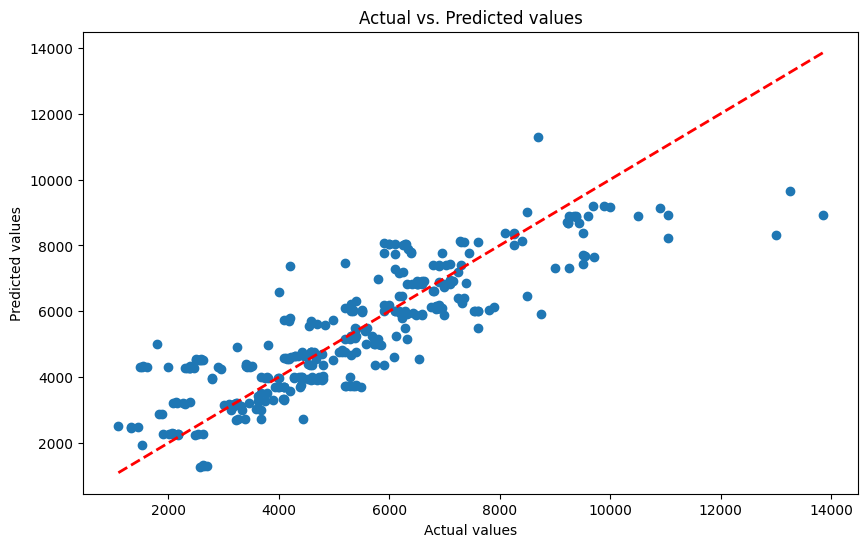

In [ ]:
alphas = np.logspace(-3, 1, 100)
leave_one_out = LeaveOneOut()
lasso_cv = LassoCV(alphas=alphas, cv=leave_one_out, random_state=0, max_iter=1000)
lasso_cv.fit(X_train, y_train)
optimal_alpha = lasso_cv.alpha_
regressor = Lasso(alpha=optimal_alpha, max_iter=1000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
print("Optimal alpha:", optimal_alpha)
print("Coefficient of determination (R^2):", score)


plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()

## 2- Xgboost Model

The model is now using the scaled data like the rest of the notebook
so it can be compared to the other models fairly

In [ ]:
xgb_model = xgb.XGBRegressor(booster = "dart",
                        learning_rate = 0.2,
                        alpha = 0.9,
                        max_leaves = 3,
                        max_depth = 6
                        )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
accuracy_percentage = r2 * 100
print("Accuracy Percentage: {:.2f}%".format(accuracy_percentage))

Accuracy Percentage: 90.61%


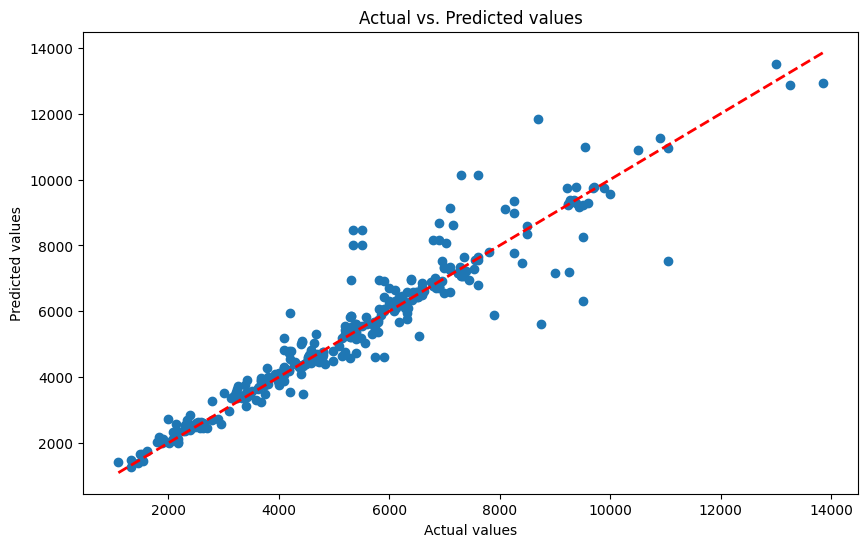

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs. Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.show()


## 3-Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=0)
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
print("Training accuracy:", train_score)


test_score = model.score(X_test, y_test)
print("Testing accuracy:", test_score)

Training accuracy: 0.9665975180840845
Testing accuracy: 0.9320323385545629


## 4-Random Forest Regression model

In [ ]:
#Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state=0)
rf.fit(X_train, y_train)

#score training
train_score = rf.score(X_train, y_train)

#score test 
test_score = rf.score(X_test, y_test)

print("Random Forest Regression:")
print("Training Score:", train_score)
print("Test Score:", test_score)




Random Forest Regression:
Training Score: 0.9620261233659692
Test Score: 0.936380828446992


## 5-GridSearchCV

In [ ]:
#hyperparameter grid
param_grid = {
    'n_estimators': [50, 100,125],
    'max_depth': [5, 10, 15 ],
    'min_samples_leaf': [1, 2, 3 ],
    'min_samples_split': [2, 5, 10 ]
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=6)
grid_search.fit(X_train, y_train)


#score training 
train2_score = grid_search.score(X_train, y_train)

#score test 
test2_score = grid_search.score(X_test, y_test)

print("Best parameters:", grid_search.best_params_)
print("Random Forest Regression scores after GridSearchCV:")
print("Training Score:", train2_score)
print("Test Score:", test2_score)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 125}
Random Forest Regression scores after GridSearchCV:
Training Score: 0.9710482197984835
Test Score: 0.9370252783063363


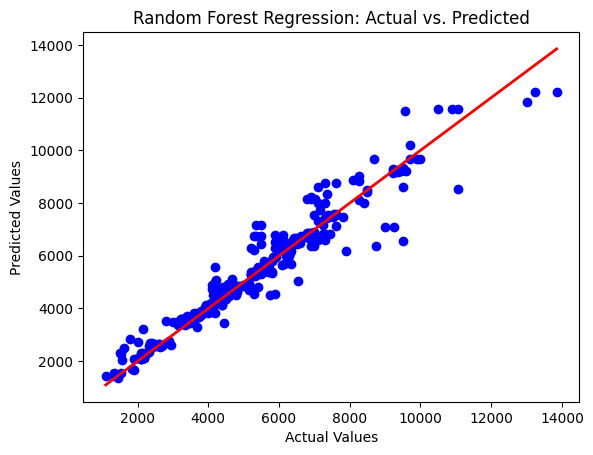

In [ ]:
# Predict on the test set
y_pred = rf.predict(X_test)

#predicted values and actual values
plt.scatter(y_test,y_pred,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs. Predicted')
plt.show()